In [2]:
#下载并用pandas导入sz50.xlsx的所有股票，索引设置为datetime，将所有股票的keys打印出来。

In [3]:
import pandas as pd
import numpy as np
data = pd.read_excel('sz50.xlsx', sheetname=None, index_col='datetime')         

C:\Users\Jack\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
print(data.keys())

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])


In [5]:
#读取data里的600036这只股票的DataFrame,将其收盘价转换成用Numpy的Array格式，并用talib计算10日均线值，返回ndarray的最后五个值

In [6]:
import talib as ta
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('sz50.xlsx', sheet_name='600036.XSHG', index_col='datetime')

#读取'numpy.ndarray'
print(ta.MA(data.close.values, 5)[-5:])

[109.272 109.902 110.724 112.568 114.85 ]


In [7]:
#将MA的ndarray数据转换成Series格式，并将价格和MA值用Matplotlib展示出来

In [10]:
s = pd.Series(ta.MA(data.close.values,10)[-5:])
rolling_mean = data['close'].rolling(window=5,center=False).mean()


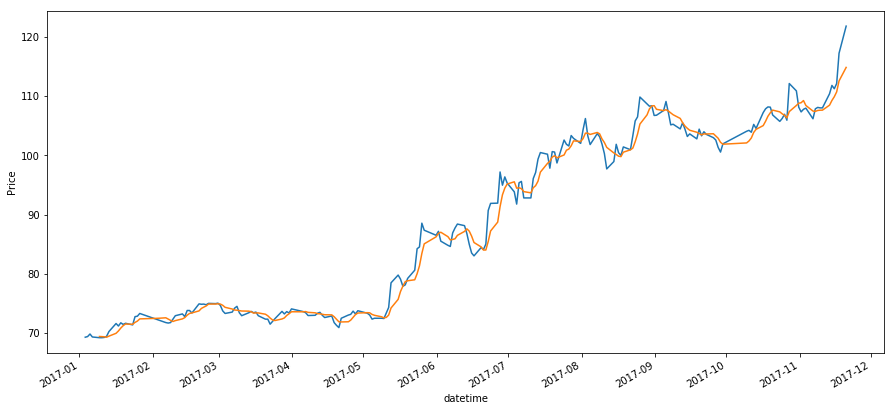

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.plot(data.close)
rolling_mean.plot()
plt.ylabel('Price')
plt.show()

In [ ]:
#用talib计算50只股票的周期为5的ROCR100，生成Dataframe，并将前5只股票的 ROCR100（参数timeperiod=20）用一张图显示出来。
#输出如下：

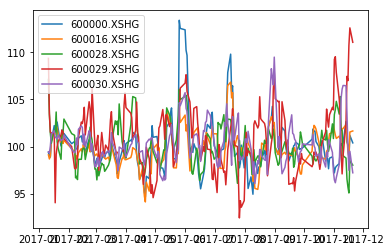

In [12]:
data=pd.read_excel('sz50.xlsx',sheetname=None, index_col='datetime')
di={}

for k,v in data.items():
    try:
        index=v.index
        di[k]=pd.Series(ta.ROCR100(v.close.values,timeperiod=5),index=index)
    except AttributeError:
        pass
df=pd.DataFrame(di)
l=df.columns.values.tolist()
for i in range(5):
    plt.plot(df[l[i]],label=l[i])
plt.legend()
plt.show()

In [ ]:
#用Panel来计算50只股票的MACD并且输出MACD的Panel的MultiIndex格式
#输出如下：

In [15]:
symbol=['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', 
        '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', 
        '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', 
        '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', 
        '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', 
        '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', 
        '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', 
        '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', 
        '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', 
        '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')#不只是收盘价close
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
if PN.isnull().values.any():
    PN.fillna(0,inplace=True)
MI = PN.to_frame()


In [16]:
print(MI.head())
pn_macd = pd.Panel({name: taab.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)

                            600000.XSHG  600016.XSHG   600028.XSHG  \
datetime            minor                                            
2017-01-03 15:00:00 close        115.99       135.93  1.094000e+01   
                    high         117.06       136.67  1.096000e+01   
                    low          115.14       135.03  1.073000e+01   
                    open         115.43       135.48  1.077000e+01   
                    volume  16232125.00  58351289.00  1.028157e+08   

                            600029.XSHG  600030.XSHG  600036.XSHG  \
datetime            minor                                           
2017-01-03 15:00:00 close         11.64        61.83        69.31   
                    high          11.69        61.98        69.39   
                    low           11.54        61.25        67.80   
                    open          11.55        61.41        67.92   
                    volume  26749400.00  62299748.00  30449820.00   

                         

NameError: name 'taab' is not defined